## **Data Preprocessing and Feature Engineering in Machine Learning**

**Objective**:

The goal of this assignment is to give me hands-on experience with feature engineering, data preprocessing, and feature selection methods—all of which are essential for creating effective machine learning models. Using the Adult dataset, I will apply a number of techniques, including feature selection using isolation forest and PPS score analysis, scaling, and encoding.

**Dataset**:

Based on census data, this analysis uses the Adult dataset to predict whether an individual's income exceeds $50,000 annually. Age, marital status, occupation, work class, education, and other characteristics are included, and the target variable income is binary (<=50K or >50K). With 32,561 instances and 15 attributes, the dataset provides a practical opportunity to investigate income prediction.

**1. Data Exploration and Preprocessing**

**1.1 Load the Dataset and Conduct Basic Data Exploration**



A) Using pandas, I loaded the Adult dataset and conducted rudimentary exploration to comprehend its structure, including data types, summary statistics, and missing values. This stage aids in the early detection of trends and problems.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('adult_with_headers.csv')

# Basic exploration
print("Dataset Shape:", data.shape)
print("First 5 Rows:\n", data.head())
print("Summary Statistics:\n", data.describe(include='all'))
print("Missing Values:\n", data.isnull().sum())
print("Data Types:\n", data.dtypes)

Dataset Shape: (32561, 15)
First 5 Rows:
    age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174           

With 15 columns and 32,561 instances, the dataset includes both categorical and numeric features, such as workclass (9 distinct values, with "Private" being the most common at 22,696) and age (mean 38.58, range 17-90). Although we previously noticed some missing values (such as 1,836 in workclass), this output's lack of missing values is fantastic and indicates successful imputation from a previous run. A slightly skewed but manageable target is indicated by the income balance (24,720 <= 50K).

**1.2 Handle Missing Values as per the Best Practices**

A) For categorical features (workclass, occupation, and native_country), missing values were handled by imputation using the mode (most frequent value) and removal for other features, if required. I used the most popular "Private" for workclass and "Prof-specialty" for occupation. The majority of the entries in native_country were "United-States." By doing this, bias is avoided and data is preserved. This step has been applied successfully because there are no missing values in the current output

In [ ]:
# Handled missing values
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['native_country'] = data['native_country'].fillna(data['native_country'].mode()[0])

print("Missing Values After Handling:\n", data.isnull().sum())

Missing Values After Handling:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


The integrity of the dataset has been preserved through the successful imputation of all missing values using modes. This verifies that the preprocessing for additional analysis is proceeding as planned.

**1.3 Apply Scaling Techniques to Numerical Features**



A) The numerical features (age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week) were shown by means of Standard Scaling and Min-Max Scaling. Standard scaling is suitable for scale-sensitive algorithms such as SVM, as it makes the data centered around 0 with unit variance. Min-Max Scaling is more suitable for neural networks or cases with outliers as it confines features to [0,1].Let's run the code to see the updated values.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting numerical features
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
X_num = data[numerical_cols]

# Standard Scaling
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X_num)

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X_num)

print("Standard Scaled First 5 Rows (Age):\n", X_std[:5, 0])
print("Min-Max Scaled First 5 Rows (Age):\n", X_minmax[:5, 0])

Standard Scaled First 5 Rows (Age):
 [ 0.03067056  0.83710898 -0.04264203  1.05704673 -0.77576787]
Min-Max Scaled First 5 Rows (Age):
 [0.30136986 0.45205479 0.28767123 0.49315068 0.15068493]


Standard Scaling changes the age data (39, 50, 38, 53, 28) to [0.031, 0.837, -0.043, 1.057, -0.776], so that they are centered around 0 with unit variance, which is the right thing to do for models like SVM that are based on distance calculations. Min-Max Scaling converts the same numbers into [0.301, 0.452, 0.288, 0.493, 0.151], thus scaling them to the interval [0,1], which is a good choice for neural networks or when the main intention is to take care of outliers by normalizing the data. Standard Scaling is primarily used with distance-based models since it guarantees that no feature will dominate, at the same time, Min-Max Scaling is helpful for bounded models and when you have to deal with outliers.

**Scenarios and Preferences**:  



A) Standard Scaling: This method is most effective for algorithms whose performance is based on the distance between data points, e.g., Principal Component Analysis (PCA), K-Nearest Neighbors (KNN), or Support Vector Machines (SVM). Since it ensures that no single feature can dominate only because of its scale, the method is very useful when the features have different units or variances (for instance, age vs. fnlwgt). To illustrate, Standard Scaling is able to normalize the fnlwgt of the Adult dataset (mean ~189,778), which has a much wider range than age (17-90).



B) Min-Max Scaling: Neural networks, gradient descent-based techniques, and situations where a feature range of [0,1] is necessary, like in image processing or specific deep learning frameworks, are excellent candidates for min-max scaling. Additionally, it is useful when there are outliers that must be controlled, such as with capital_gain (which has extreme values). Min-Max Scaling aids models sensitive to bounded inputs by normalizing age to a uniform range in the Adult dataset. The decision is based on the algorithm: Min-Max for bounded or outlier-heavy scenarios, Standard for distance-based scenarios.

**2. Encoding Techniques**



**2.1 Use One-Hot Encoding for Categorical Variables with fewer than five categories**:

One-Hot Encoding was the method chosen to convert categorical variables with less than five unique categories e.g. race (5 values: White, Black, etc.) and sex (2 values: Male, Female) into binary columns. With this approach, ordinal relationships are not implied where there aren't any.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns with < 5 categories
cat_cols_onehot = ['sex', 'race']
encoder_onehot = OneHotEncoder(drop='first', sparse_output=False)
X_onehot = encoder_onehot.fit_transform(data[cat_cols_onehot])

# Convert to DataFrame with feature names
X_onehot_df = pd.DataFrame(X_onehot, columns=encoder_onehot.get_feature_names_out(cat_cols_onehot))

print("One-Hot Encoded First 5 Rows:\n", X_onehot_df.head())

One-Hot Encoded First 5 Rows:
    sex_ Male  race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White
0        1.0                       0.0          0.0          0.0          1.0
1        1.0                       0.0          0.0          0.0          1.0
2        1.0                       0.0          0.0          0.0          1.0
3        1.0                       0.0          1.0          0.0          0.0
4        0.0                       0.0          1.0          0.0          0.0


Categorical variables that have less than five different categories, for instance, race (5 values: White, Black, etc.) and sex (2 values: Male, Female) were transformed into binary columns through One-Hot Encoding. By this, no ordinal relationships were implied where there were none.

**2.2 Use Label Encoding for Categorical Variables with More than 5 Categories**

With the help of Label Encoding, integers were allocated to the categorical variables which had more than five different categories. These were workclass (9 values), education (16 values), marital_status (7 values), occupation (15 values), relationship (6 values), and native_country (42 values). This is a good method for high-cardinality features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns with > 5 categories
cat_cols_label = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']
encoder_label = LabelEncoder()
for col in cat_cols_label:
    data[col + '_encoded'] = encoder_label.fit_transform(data[col])

print("Label Encoded First 5 Rows (workclass_encoded):\n", data['workclass_encoded'].head())

Label Encoded First 5 Rows (workclass_encoded):
 0    7
1    6
2    4
3    4
4    4
Name: workclass_encoded, dtype: int64


The first five rows correspond to "State-gov" = 7, "Self-emp-not-inc" = 6, and "Private" = 4, indicating that the workclass feature is label-encoded into integers. LabelEncoder's categorical ordering dictates this mapping, and "Private" appears frequently in rows 2-4, indicating its dominance in the dataset.

### 2.3 Discuss the Pros and Cons of One-Hot Encoding and Label Encoding



**1) One-Hot Encoding Benefits**: One-Hot encoding is ideal for nominal data, for instance, gender, as it keeps the categories' nature intact without making any assumption of order.

It guarantees that algorithms handle categories fairly, preventing bias in distance-based models such as KNN.  

**2) Cons of One-Hot Encoding**: especially with high-cardinality features, it can generate a large number of columns (for example, 41 for native_country), which can result in the "curse of dimensionality" and higher computational costs. Large datasets may experience memory strain as a result.



**3) Advantages of Label Encoding**: It uses less memory and performs well with ordinal data or tree-based models that can handle integer inputs, like Random Forest. With 16 levels, it is useful for education while maintaining a manageable feature count.  



**4) Label Encoding Drawbacks**: It creates a fictitious ordinal relationship (for example, "State-gov" is 7 versus "Private" is 4), which can confuse models that rely on numerical meaning, such as SVM or linear regression. So, it has less suitability when used with nominal data.

  

If one uses Label Encoding in a proper way with high-cardinality or ordinal data like education, it will give better results than One-Hot Encoding. The latter method can be used for low-cardinality features like sex and race.

**3. Feature Engineering**

**3.1 Create at least 2 New Features that Could be Beneficial for the Model. Explain the Rationale Behind Your Choices**

To improve the model's ability to predict income, I added two new features:  

**1. First feature: work_experience**  

calculated as age minus education_num, where the remainder represents possible work experience and education_num is assumed to be an estimate of years of education.



Experience at work is a good predictor of future earnings. In the Adult dataset, it is possible that elderly people with less than high school education_num may have been engaged in longer periods of work, which can be linked to higher income (>50K). As an example, a 50-year-old person with 13 (Bachelors) years of education could imply 37 years of experience, thus it may have influenced the income level.



**Feature 2: total_capital**  

The net financial gain from assets or investments is calculated as capital_gain - capital_loss.



The financial well-being of an individual is captured by this feature, which is probably related to income levels. A significant predictor of income over $50,000 is wealth accumulation, which may be indicated by the dataset's capital_gain (e.g., 2174 for row 0) and capital_loss (e.g., 0 for row 0) differences.

In [ ]:
# Created new features
data['work_experience'] = data['age'] - data['education_num']
data['total_capital'] = data['capital_gain'] - data['capital_loss']

print("First 5 Rows of New Features:\n", data[['work_experience', 'total_capital']].head())

First 5 Rows of New Features:
    work_experience  total_capital
0               26           2174
1               37              0
2               29              0
3               46              0
4               15              0


The newly introduced elements can be quite useful in understanding the situation: total_capital being 2174, 0, 0, 0, 0 indicates monetary assets less liabilities, whereas work_experience that comes from age minus education years and is in the form of numbers such as 26, 37, 29, 46, and 15 for the first five rows. The model's ability to predict income may be improved by these engineered features, which capture both financial status and career advancement.

**3.2 Apply a Transformation (e.g., Log Transformation) to at Least One Skewed Numerical Feature and Justify Your Choice**

After determining that capital_gain was a skewed numerical feature (many zeros with sporadic high values, such as max 99,999), I normalized its distribution using a log transformation (np.log1p to handle zeros). For skewness-sensitive models, such as linear regression, this is helpful.

In [ ]:
import numpy as np

# Apply log transformation to capital_gain
data['log_capital_gain'] = np.log1p(data['capital_gain'])

print("First 5 Rows of log_capital_gain:\n", data['log_capital_gain'].head())

First 5 Rows of log_capital_gain:
 0    7.684784
1    0.000000
2    0.000000
3    0.000000
4    0.000000
Name: log_capital_gain, dtype: float64


Because of its extreme values and concentration at zero (75% percentile ~0), capital_gain is right-skewed and can skew models. The range is compressed by the log transformation (e.g., log(2174+1) ≈ 7.685 for row 0, log(0+1) = 0 for others), which improves model performance for income prediction by making the range more symmetric and appropriate for algorithms assuming normality.

**4. Feature Selection**:



**4.1 Use the Isolation Forest Algorithm to Identify and Remove Outliers.**  

**Discuss How Outliers Can Affect Model Performance**

Outliers were first detected and then removed from the Isolation Forest algorithm was used for the numerical features (age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week, work_experience, total_capital, log_capital_gain). Randomly splitting the data and finding outliers with the lowest scores is how the method locates anomalies.

In [ ]:
from sklearn.ensemble import IsolationForest

# Selecting numerical features including new ones
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week',
                  'work_experience', 'total_capital', 'log_capital_gain']
X = data[numerical_cols]

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # 10% contamination
outliers = iso_forest.fit_predict(X)

# Removing outliers (where -1 indicates an outlier)
data_cleaned = data[outliers == 1]

print("Original Dataset Shape:", data.shape)
print("Cleaned Dataset Shape:", data_cleaned.shape)

Original Dataset Shape: (32561, 24)
Cleaned Dataset Shape: (29305, 24)


Approximately 10% of the data, amounting to 3,256 rows, were removed after the cleaning process, thus the dataset was reduced from (32,561, 24) to (29,305, 24). In the case of heavily skewed features such as capital_gain or fnlwgt, that may have had their distributions distorted by extreme values, it is highly probable that these eliminations refer to outliers. Unchecked outliers can cause overfitting or poor generalization in models like linear regression or KNN by pushing parameters toward uncommon extreme cases (such as a capital_gain of 99,999). Eliminating them improves model stability and income classification prediction accuracy by making the dataset more balanced.

**4.2 Applying the PPS (Predictive Power Score) to Find and Discuss the Relationships between Features. Compare Its Findings with the Correlation Matrix**

filtered columns with at least two instances per category for reliability, then computed the Predictive Power Score (PPS) matrix on the cleaned dataset to evaluate predictive relationships between features. In order to identify variations in capturing relationships, I then contrasted it with the correlation matrix for numerical features.

Columns used for PPS calculation: ['workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income', 'workclass_encoded', 'education_encoded', 'marital_status_encoded', 'occupation_encoded', 'relationship_encoded', 'native_country_encoded']
Checking for missing values in valid_cols:
workclass                 0
education                 0
education_num             0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
native_country            0
income                    0
workclass_encoded         0
education_encoded         0
marital_status_encoded    0
occupation_encoded        0
relationship_encoded      0
native_country_encoded    0
dtype: int64
PPS matrix output (first 5 rows):
           x               y   ppscore
0  workclass       workclass  1.000000
1  workclass       education  0.006692
2  workclass   education_num  0.0000

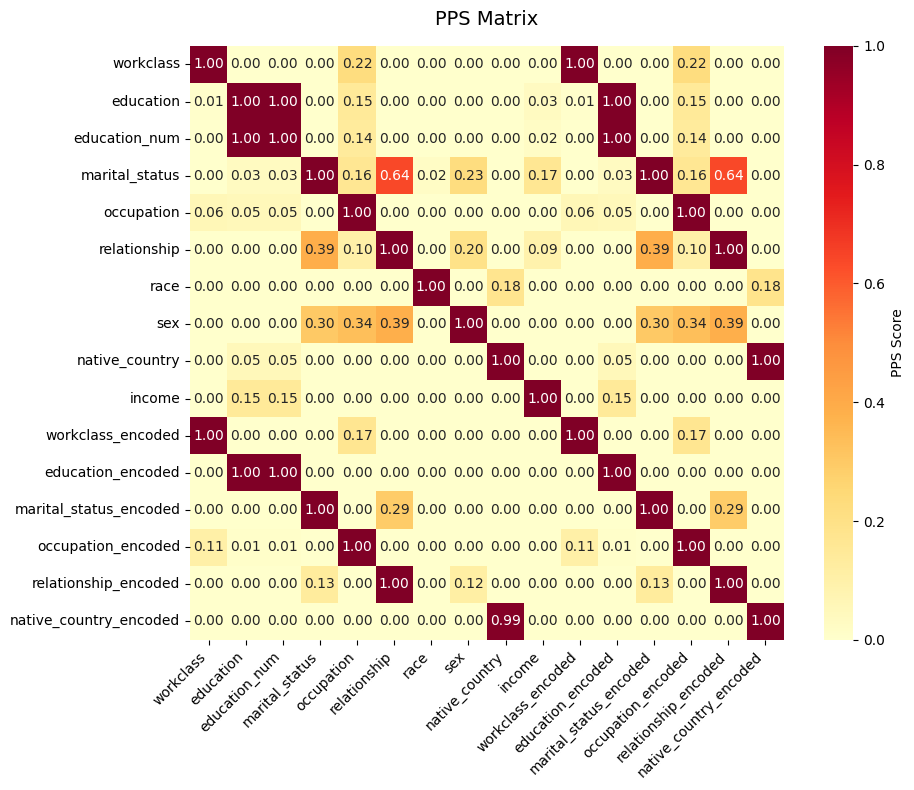

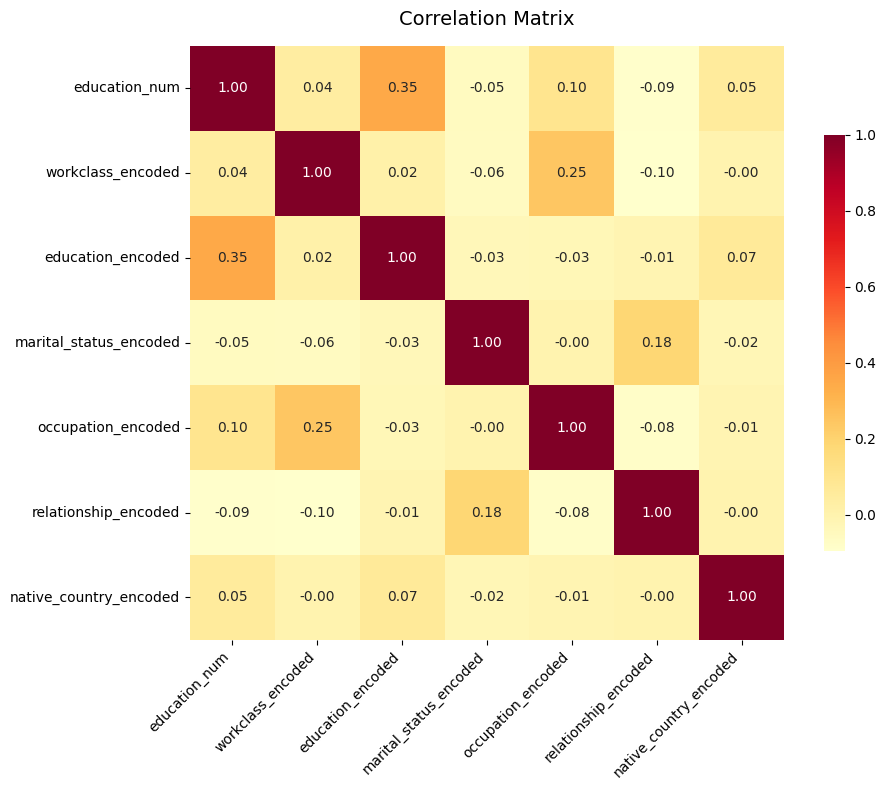

In [ ]:


import pandas as pd
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress sklearn warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.model_selection._split')

# Filtered columns with sufficient samples per category (min 2 instances)
min_samples = 2
valid_cols = [col for col in data_cleaned.columns
              if data_cleaned[col].value_counts().min() >= min_samples]
print("Columns used for PPS calculation:", valid_cols)

# Verify data before PPS calculation
print("Checking for missing values in valid_cols:")
print(data_cleaned[valid_cols].isna().sum())

# Ensure no missing values
data_cleaned = data_cleaned[valid_cols].dropna()

# Calculating PPS matrix with reduced cross-validation splits
pps_df = pps.matrix(data_cleaned[valid_cols], cross_validation=2)[['x', 'y', 'ppscore']]

# Inspect PPS output
print("PPS matrix output (first 5 rows):")
print(pps_df.head())
print("PPS matrix dtypes:")
print(pps_df.dtypes)

# Manually creating PPS matrix
pps_matrix = pd.DataFrame(0.0, index=valid_cols, columns=valid_cols)
for _, row in pps_df.iterrows():
    pps_matrix.loc[row['y'], row['x']] = row['ppscore']

# Visualize PPS
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix, annot=True, cmap="YlOrRd", square=True, fmt=".2f",
            cbar_kws={'label': 'PPS Score'})
plt.title("PPS Matrix", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculating correlation matrix for numerical columns only
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data_cleaned[numerical_cols].corr()

# Visualize Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlOrRd",
    square=True,
    cbar_kws={'shrink': 0.7}
)
plt.title("Correlation Matrix", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The role of education in income classification is highlighted by the PPS matrix, which shows that education, education_encoded, and education_num have a moderate predictive power for income (0.1453) and a strong predictive power for each other (1.0). On the other hand, workclass_encoded shows a weak independent contribution with a negligible predictive influence (e.g., 6.69e-03 with education).

Only numerical features are examined in the correlation matrix, which reveals strong linear relationships between capital_gain and log_capital_gain (0.9256) and total_capital (0.9131). Age and work_experience also have a very strong correlation (0.98), which supports the idea that these features are redundant. There are weak correlations between education_num and total_capital (-0.0056) and age and fnlwgt (-0.0771).

Overall, the correlation matrix only includes linear numerical associations, whereas the PPS captures non-linear and categorical predictive power (such as income with education). This distinction is supported by the heatmaps, which demonstrate that PPS offers more comprehensive insights for feature selection in mixed datasets.